### *Importing important libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

### *Loading Dataset*

In [2]:
# Load the dataset
data_path = './diabetes.csv'
diabetes_df = pd.read_csv(data_path)

### *Calculating the Ratio of Each Outcome*
#### *- Useing `value_counts` with normalization to calculate the proportion of each outcome class.*
#### *- Convert the normalized values to a dictionary for easy readability.*

In [3]:
# Calculate the ratio of each outcome
outcome_counts = diabetes_df['Outcome'].value_counts(normalize=True)  # Normalized to get ratios
outcome_ratios = outcome_counts.to_dict()  # Convert to a dictionary for readability

# Display the results
print("Outcome Ratios:")
for outcome, ratio in outcome_ratios.items():
    print(f"Outcome {outcome}: {ratio:.2%}")


Outcome Ratios:
Outcome 0: 65.10%
Outcome 1: 34.90%


#### *Display initial details about the dataset*

In [4]:
print("Initial Dataset Info:")
diabetes_df.info()
print("\nFirst 5 rows:\n", diabetes_df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29     

### *Identifing Attributes with Zero Values*
#### *- Counting the number of zero values in each column.*
#### *- Displaying columns with zero values and their respective counts.*

In [5]:
# Identify attributes with zero values
zero_value_columns = (diabetes_df == 0).sum()
zero_value_columns = zero_value_columns[zero_value_columns > 0]
print("\nAttributes with zero values and their counts:\n")
print(zero_value_columns)


Attributes with zero values and their counts:

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


### *Step 1: Handling Missing or Zero Values*
#### *- Specifying columns to replace zero values with missing (NaN).*

In [6]:
# Step 1: Handle Missing or Zero Values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

### *Replacing Zero Values with NaN and Impute Missing Data*
#### *- Replacing zero values with NaN for the specified columns.*
#### *- Imputing missing values using the median strategy.*

In [7]:
# Replace zero values with NaN for imputation
diabetes_df[columns_with_zeros] = diabetes_df[columns_with_zeros].replace(0, np.nan)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
diabetes_df[columns_with_zeros] = imputer.fit_transform(diabetes_df[columns_with_zeros])

#### *- Displaying a summary of the dataset to confirm changes.*

In [8]:
print("\nMissing values handled. Dataset summary:\n")
print(diabetes_df.describe())


Missing values handled. Dataset summary:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.4

### Step 2: Feature Scaling
#### *- Scaling numerical features using Min-Max scaling.*
#### *- Excluding the target variable ('Outcome') from scaling.*

In [9]:
# Step 2: Feature Scaling
scaler = MinMaxScaler()
numerical_columns = diabetes_df.columns[:-1]  # Exclude the target variable 'Outcome'
diabetes_df[numerical_columns] = scaler.fit_transform(diabetes_df[numerical_columns])

print("\nData after scaling:\n")
print(diabetes_df.head())


Data after scaling:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2     0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


### *Step 3: Correlation Heatmap*
#### *- Compute and visualize the correlation matrix to understand feature relationships.*


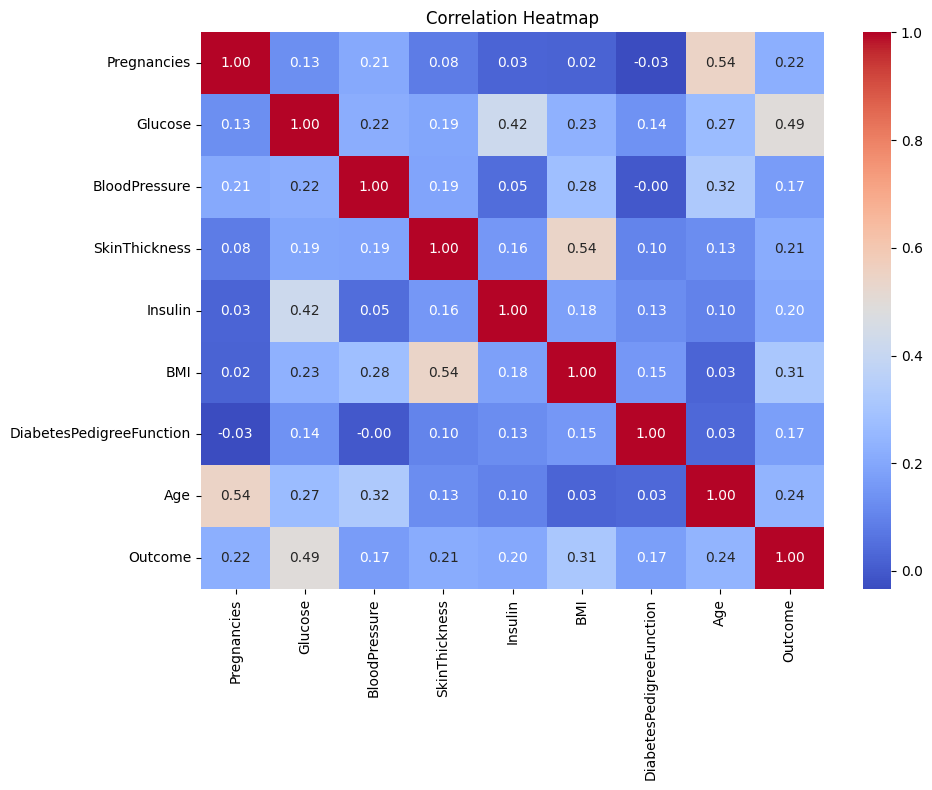

In [10]:
# Step 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### *Step 4: Feature Selection Using Chi-Square Test*
#### *- Selecting features based on their importance scores computed using the Chi-Square test.*
#### *- Displaying the scores for all features in descending order.*

In [11]:
# Step 4: Feature Selection using Chi-Square
X = diabetes_df[numerical_columns]
y = diabetes_df['Outcome']
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = pd.DataFrame({
    'Feature': numerical_columns,
    'Score': chi2_selector.scores_
}).sort_values('Score', ascending=False)

print("\nFeature Importance Scores:\n")
print(chi2_scores)


Feature Importance Scores:

                    Feature      Score
1                   Glucose  14.336331
7                       Age   8.205691
0               Pregnancies   6.559982
5                       BMI   5.064034
6  DiabetesPedigreeFunction   2.758584
4                   Insulin   2.255362
3             SkinThickness   1.345611
2             BloodPressure   0.650037


#### *- Removing features with a Chi-Square score less than 1.*
#### *- Displaying the removed columns for reference.*

In [12]:
# Remove columns with correlation less than 1
low_correlation_columns = chi2_scores[chi2_scores['Score'] < 1]['Feature'].tolist()
diabetes_df.drop(columns=low_correlation_columns, inplace=True)
print(f"\nColumns removed due to low correlation: {low_correlation_columns}")


Columns removed due to low correlation: ['BloodPressure']


#### *- Display the number of missing values in the dataset after processing.*


In [13]:
# Print summary statistics
print("\nMissing Values After Processing:")
print(diabetes_df.isnull().sum())


Missing Values After Processing:
Pregnancies                 0
Glucose                     0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


####  - Saving the processed dataset to a CSV file for further. 

In [14]:
# Save the processed dataset
processed_file_path = 'processed_diabetes.csv'  
diabetes_df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved to {processed_file_path}")

Processed dataset saved to processed_diabetes.csv


### *Initializing and Applying SMOTETomek*
#### *- Performing oversampling (SMOTE) and undersampling (Tomek Links) to balance the dataset.*
#### *- Combining balanced features and target variables into a new dataframe.*
#### *- Verifying the class distribution in the balanced dataset.*


In [15]:
# Initialize and apply SMOTETomek
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_balanced, y_balanced = smote_tomek.fit_resample(X, y)

# Create balanced dataframe
balanced_df = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), 
                        pd.DataFrame(y_balanced, columns=['Outcome'])], axis=1)

# Verify the new class distribution
print("Balanced Dataset Class Distribution:")
print(balanced_df['Outcome'].value_counts(normalize=True).map('{:.2%}'.format))

# Save the balanced dataset
balanced_df.to_csv('balanced_diabetes.csv', index=False)

Balanced Dataset Class Distribution:
1    50.00%
0    50.00%
Name: Outcome, dtype: object
